In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('resources/Vodafone_Customer_Churn_Sample_Dataset.csv')

In [36]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [37]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [38]:
df = df.drop(columns=['customerID'])

In [39]:
# How many churn/not churn customers are there?
churn_counts = df['Churn'].value_counts()
print(f"Churn counts:\n{churn_counts}")

Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


# Column types

- gender: binary
- SeniorCitizen: binary
- Partner: binary
- Dependents: binary
- tenure: ordinal
- PhoneService: binary
- MultipleLines: categorical (Yes, No, No phone service)
- Internet Service: categorical (DSL, Fiber optic, No)
- Online Security: categorical (Yes, No, No internet Service)
- Online Backup: categorical (Yes, No, No internet Service)
- DeviceProtection: categorical (Yes, No, No internet Service)
- TechSupport: categorical (Yes, No, No internet Service)
- StreamingTV: categorical (Yes, No, No internet Service)
- StreamingMovies: categorical (Yes, No, No internet Service)
- Contract: ordinal (Month-to-month, One Year, Two Year)
- PaperlessBilling: binary
- PaymentMethod: categorical (Electronic check, Mailed check, Bank transfer (automatic), Credit card)
- MonthlyCharges: numerical
- TotalCharges: numerical
- Churn: binary

## Preprocess column types

In [40]:
# binary columns
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(bool)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}).astype(bool)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0}).astype(bool)
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0}).astype(bool)
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0}).astype(bool)
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0}).astype(bool)

In [41]:
# categorical columns
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']
for col in categorical_cols:
    df[col] = enc.fit_transform(df[[col]]).toarray()

In [42]:
# Contract is ordinal
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
df['Contract'] = ord_enc.fit_transform(df[['Contract']])

In [43]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

## Train Test split

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with stratification
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Churn'])

# Verify the churn ratio in train and test sets
print("Churn ratio in train set:")
print(train_df['Churn'].value_counts(normalize=True))
print("\nChurn ratio in test set:")
print(test_df['Churn'].value_counts(normalize=True))

Churn ratio in train set:
Churn
False    0.734686
True     0.265314
Name: proportion, dtype: float64

Churn ratio in test set:
Churn
False    0.734501
True     0.265499
Name: proportion, dtype: float64


In [45]:
# Separate features and target variable
X_train = train_df.drop(columns=['Churn'])
y_train = train_df['Churn']
X_test = test_df.drop(columns=['Churn'])
y_test = test_df['Churn']

## Decision Tree Classifier

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Define the parameter grid


def decision_tree_classifier(X_train, y_train, X_test, y_test):
    """
    Function to perform grid search for Decision Tree Classifier
    :param X_train: Training features
    :param y_train: Training labels
    :param X_test: Testing features
    :param y_test: Testing labels
    :return: None
    """
    # Define the parameter grid
    param_grid = {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'splitter': ['best', 'random'],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }

    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=5,
                            n_jobs=-1)

    # Perform the grid search
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation accuracy:", grid_search.best_score_)

    # Use the best estimator to make predictions
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    return best_clf

best_clf = decision_tree_classifier(X_train, y_train, X_test, y_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation accuracy: 0.7898580121703853
Test set accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1552
        True       0.64      0.49      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



## Logistic Regression Classifier

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from time import sleep


def logistic_regression_classifier(X_train, y_train, X_test, y_test):
    # Handle missing values by imputing with the mean
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Define the parameter grid with valid solver-penalty combinations
    param_grid = {
        'penalty': ['l1', 'l2'],  # l1 is valid only with 'liblinear' and 'saga'
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],  # Exclude 'lbfgs' as it doesn't support 'l1'
        'max_iter': [200, 500, 1000],
    }

    # Initialize the GridSearchCV object
    grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=5,
                            n_jobs=-1)

    # Perform the grid search

    grid_search.fit(X_train_imputed, y_train)

    # Wait for 2 seconds to print after all the warnings
    sleep(2)
    # Print the best parameters and the best score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation accuracy:", grid_search.best_score_)

    # Use the best estimator to make predictions
    best_log_reg = grid_search.best_estimator_
    y_pred_log_reg = best_log_reg.predict(X_test_imputed)

    # Evaluate the model
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    print(f"Test set accuracy: {accuracy_log_reg:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_log_reg))
    return best_log_reg


best_log_reg = logistic_regression_classifier(X_train, y_train, X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter 

Best parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8028397565922919
Test set accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1552
        True       0.66      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



## KNN Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer


def knn_classifier(X_train, y_train, X_test, y_test):
    # Handle missing values by imputing with the mean
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # Define the parameter grid for KNN
    param_grid_knn = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }

    # Initialize the GridSearchCV object for KNN
    grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                                param_grid=param_grid_knn,
                                scoring='accuracy',
                                cv=5,
                                n_jobs=-1)

    # Perform the grid search
    grid_search_knn.fit(X_train_imputed, y_train)

    # Print the best parameters and the best score
    print("Best parameters for KNN:", grid_search_knn.best_params_)
    print("Best cross-validation accuracy for KNN:", grid_search_knn.best_score_)

    # Use the best estimator
    knn = grid_search_knn.best_estimator_

    # Make predictions on the test set
    y_pred_knn = knn.predict(X_test_imputed)
    # Evaluate the model
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    print(f"Test set accuracy for KNN: {accuracy_knn:.2f}")
    print("\nClassification Report for KNN:")
    print(classification_report(y_test, y_pred_knn))
    return knn


knn = knn_classifier(X_train, y_train, X_test, y_test)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.7772819472616633
Test set accuracy for KNN: 0.78

Classification Report for KNN:
              precision    recall  f1-score   support

       False       0.81      0.90      0.85      1552
        True       0.61      0.43      0.51       561

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.78      0.76      2113



## Plot feature importance

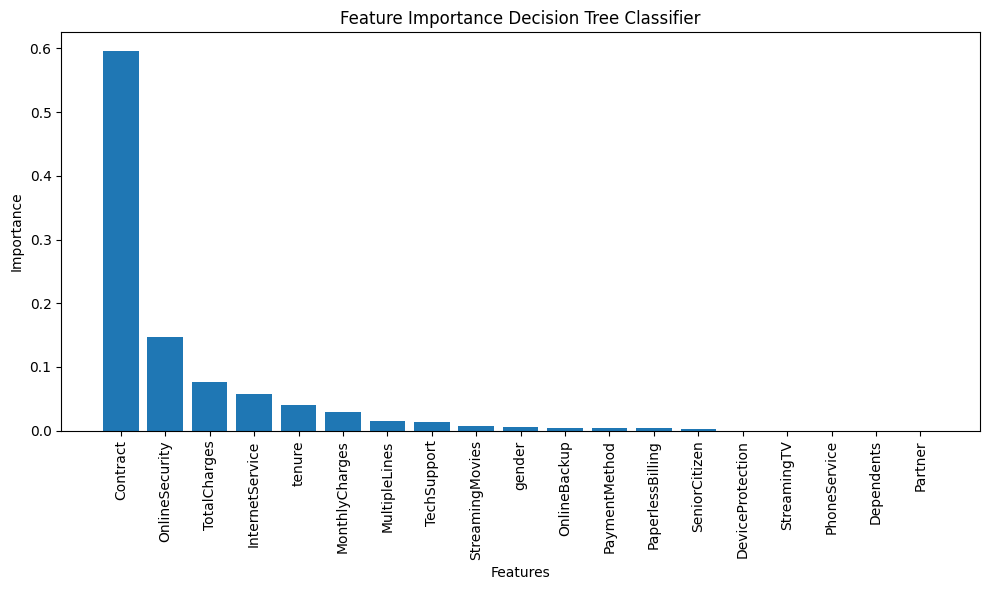

In [49]:
import numpy as np

import matplotlib.pyplot as plt

# Get feature importance from the best classifier
feature_importances = best_clf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance Decision Tree Classifier")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


# Treat more features as ordinal ones

In [50]:
df = pd.read_csv('/Users/mp/viscode-github/dept_assignment/resources/Vodafone_Customer_Churn_Sample_Dataset.csv')
df = df.drop(columns=['customerID'])

In [51]:
# binary columns
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(bool)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0}).astype(bool)
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0}).astype(bool)
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0}).astype(bool)
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0}).astype(bool)
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0}).astype(bool)

In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [53]:
# categorical columns
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
categorical_cols = ['PaymentMethod']
df['PaymentMethod'] = enc.fit_transform(df[['PaymentMethod']]).toarray()

In [54]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

category_orders = [
    ['No phone service', 'No', 'Yes'],  
    ['No', 'DSL', 'Fiber optic'],
    ['No internet service', 'No', 'Yes'],
    ['No internet service', 'No', 'Yes'],
    ['No internet service', 'No', 'Yes'],
    ['No internet service', 'No', 'Yes'],
    ['No internet service', 'No', 'Yes'],
    ['No internet service', 'No', 'Yes'],
    ['Month-to-month', 'One year', 'Two year'],

]

# Initialize the OrdinalEncoder with the category orders
ord_enc = OrdinalEncoder(categories=category_orders)

# Apply the encoder to the selected columns
df[ordinal_cols] = ord_enc.fit_transform(df[ordinal_cols])


In [55]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [56]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets with stratification
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['Churn'])

# Verify the churn ratio in train and test sets
print("Churn ratio in train set:")
print(train_df['Churn'].value_counts(normalize=True))
print("\nChurn ratio in test set:")
print(test_df['Churn'].value_counts(normalize=True))

Churn ratio in train set:
Churn
False    0.734686
True     0.265314
Name: proportion, dtype: float64

Churn ratio in test set:
Churn
False    0.734501
True     0.265499
Name: proportion, dtype: float64


## Run the models again

In [58]:
best_clf = decision_tree_classifier(X_train, y_train, X_test, y_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best cross-validation accuracy: 0.7898580121703853
Test set accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1552
        True       0.64      0.49      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [59]:
best_log_reg = logistic_regression_classifier(X_train, y_train, X_test, y_test)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter 

Best parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.8028397565922919
Test set accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.87      1552
        True       0.66      0.54      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [60]:
best_knn = knn_classifier(X_train, y_train, X_test, y_test)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.7772819472616633
Test set accuracy for KNN: 0.78

Classification Report for KNN:
              precision    recall  f1-score   support

       False       0.81      0.90      0.85      1552
        True       0.61      0.43      0.51       561

    accuracy                           0.78      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.78      0.76      2113



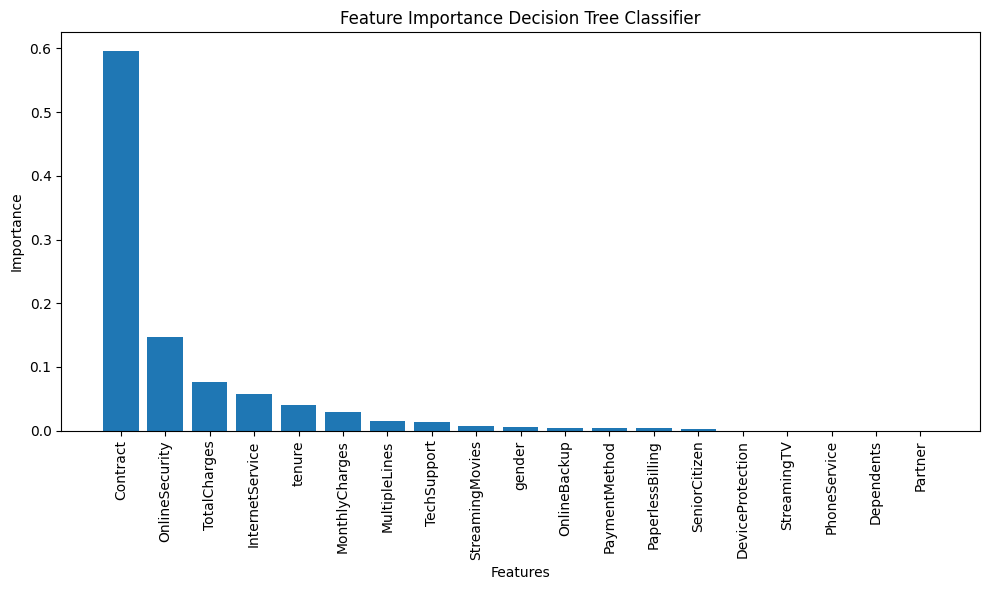

In [61]:
# Get feature importance from the best classifier
feature_importances = best_clf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance Decision Tree Classifier")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# PCA

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply PCA
pca = PCA(n_components=6)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.218485   0.14303554 0.09994832 0.06635625 0.05584993 0.05289049]


## Run the models with PCA features

In [64]:
best_clf = decision_tree_classifier(X_train_pca, y_train, X_test_pca, y_test)

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation accuracy: 0.7823529411764706
Test set accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.92      0.86      1552
        True       0.64      0.39      0.49       561

    accuracy                           0.78      2113
   macro avg       0.73      0.66      0.67      2113
weighted avg       0.76      0.78      0.76      2113



In [65]:
best_log_reg = logistic_regression_classifier(X_train_pca, y_train, X_test_pca, y_test)

Best parameters: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation accuracy: 0.7983772819472617
Test set accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.88      0.86      1552
        True       0.61      0.51      0.56       561

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



In [66]:
best_knn = knn_classifier(X_train_pca, y_train, X_test_pca, y_test)

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.775659229208925
Test set accuracy for KNN: 0.77

Classification Report for KNN:
              precision    recall  f1-score   support

       False       0.83      0.86      0.85      1552
        True       0.57      0.50      0.53       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113

